In [2]:
import functions
import matplotlib.pyplot as plt
import numpy as np

velocities = range(1,6)
# velocities = [1, 3, 5]
tmax = 1000
L = 500
N = 100
vmax = 5
p = 0.2

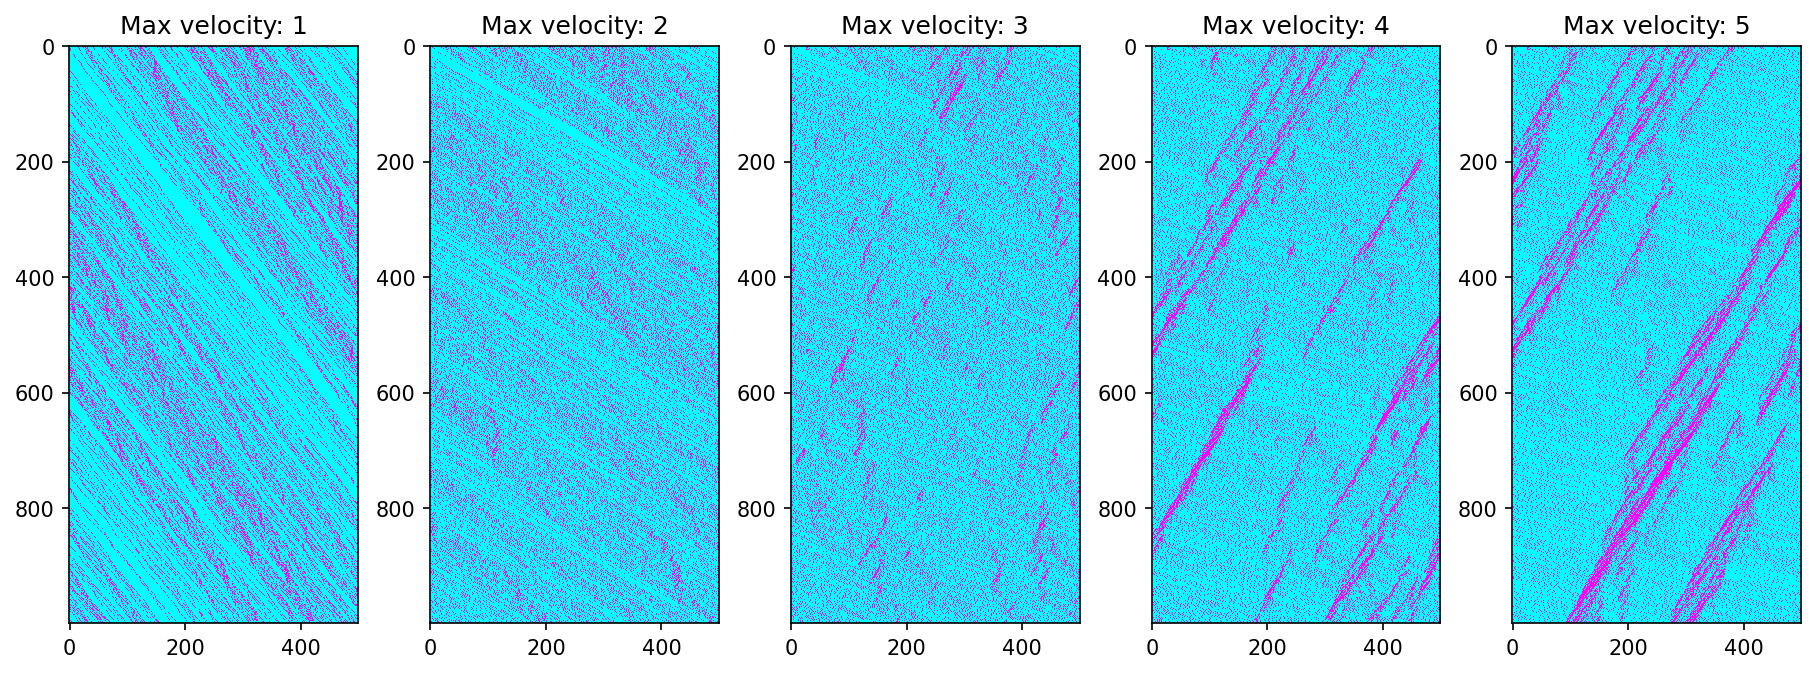

In [3]:
fig, axs = plt.subplots(1,len(velocities), figsize = (len(velocities)*3, 5), dpi=150)
for v in velocities:
    simulation = functions.Nagel_Schreckenberg(L, N, v, p, tmax)
    simulation.run_model()
    points = np.zeros((tmax, L))
    for i in range(L):
        for j in range(tmax):
            if simulation.positions[j][i] > -1:
                points[j][i] = 1
            else:
                points[j][i] = 0
    axs[velocities.index(v)].set_title('Max velocity: {}'.format(v))
    axs[velocities.index(v)].imshow(points, cmap = "cool", interpolation = "nearest")
plt.show()



In [4]:
'''
Not using for presentation
'''

# plt.figure(figsize=(10,10), dpi=150)

# for v in velocities:
#     simulation = functions.Nagel_Schreckenberg(L, N, v, p, tmax)[2]
#     plt.plot(range(tmax), simulation, label = 'Max velocity: {}'.format(v), alpha = 0.7)
#     plt.xlabel('Time-steps')|
#     plt.ylabel('Number of cells in clusters')
#     plt.title('Cluster Distribution')
#     plt.legend()

# plt.show()

'\nNot using for presentation\n'

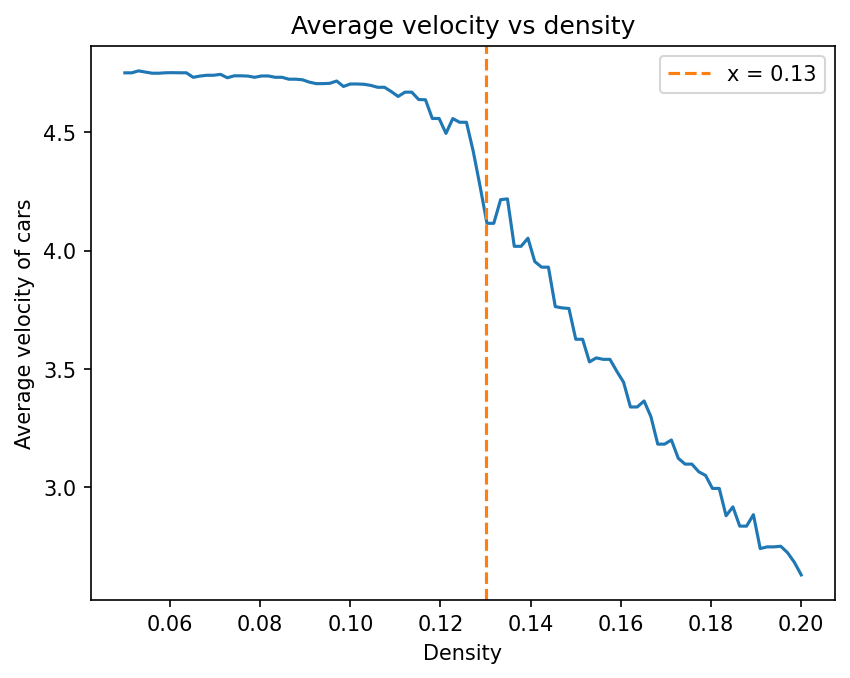

In [9]:
densities = np.linspace(0.05, 0.2, 100)

velocity_averages = []

for density in densities:
    simulation = functions.Nagel_Schreckenberg(L, int(L * density), vmax, p, tmax)
    simulation.run_model()
    velocity_average = simulation.average_velocity()
    velocity_averages.append(velocity_average)

# Plotting
plt.figure(dpi=150)
plt.plot(densities, velocity_averages)
plt.xlabel('Density')
plt.ylabel('Average velocity of cars')
plt.title('Average velocity vs density')
plt.axvline(x = 0.13,  color = 'tab:orange', linestyle = '--', label = 'x = 0.13')
plt.legend()
plt.show()

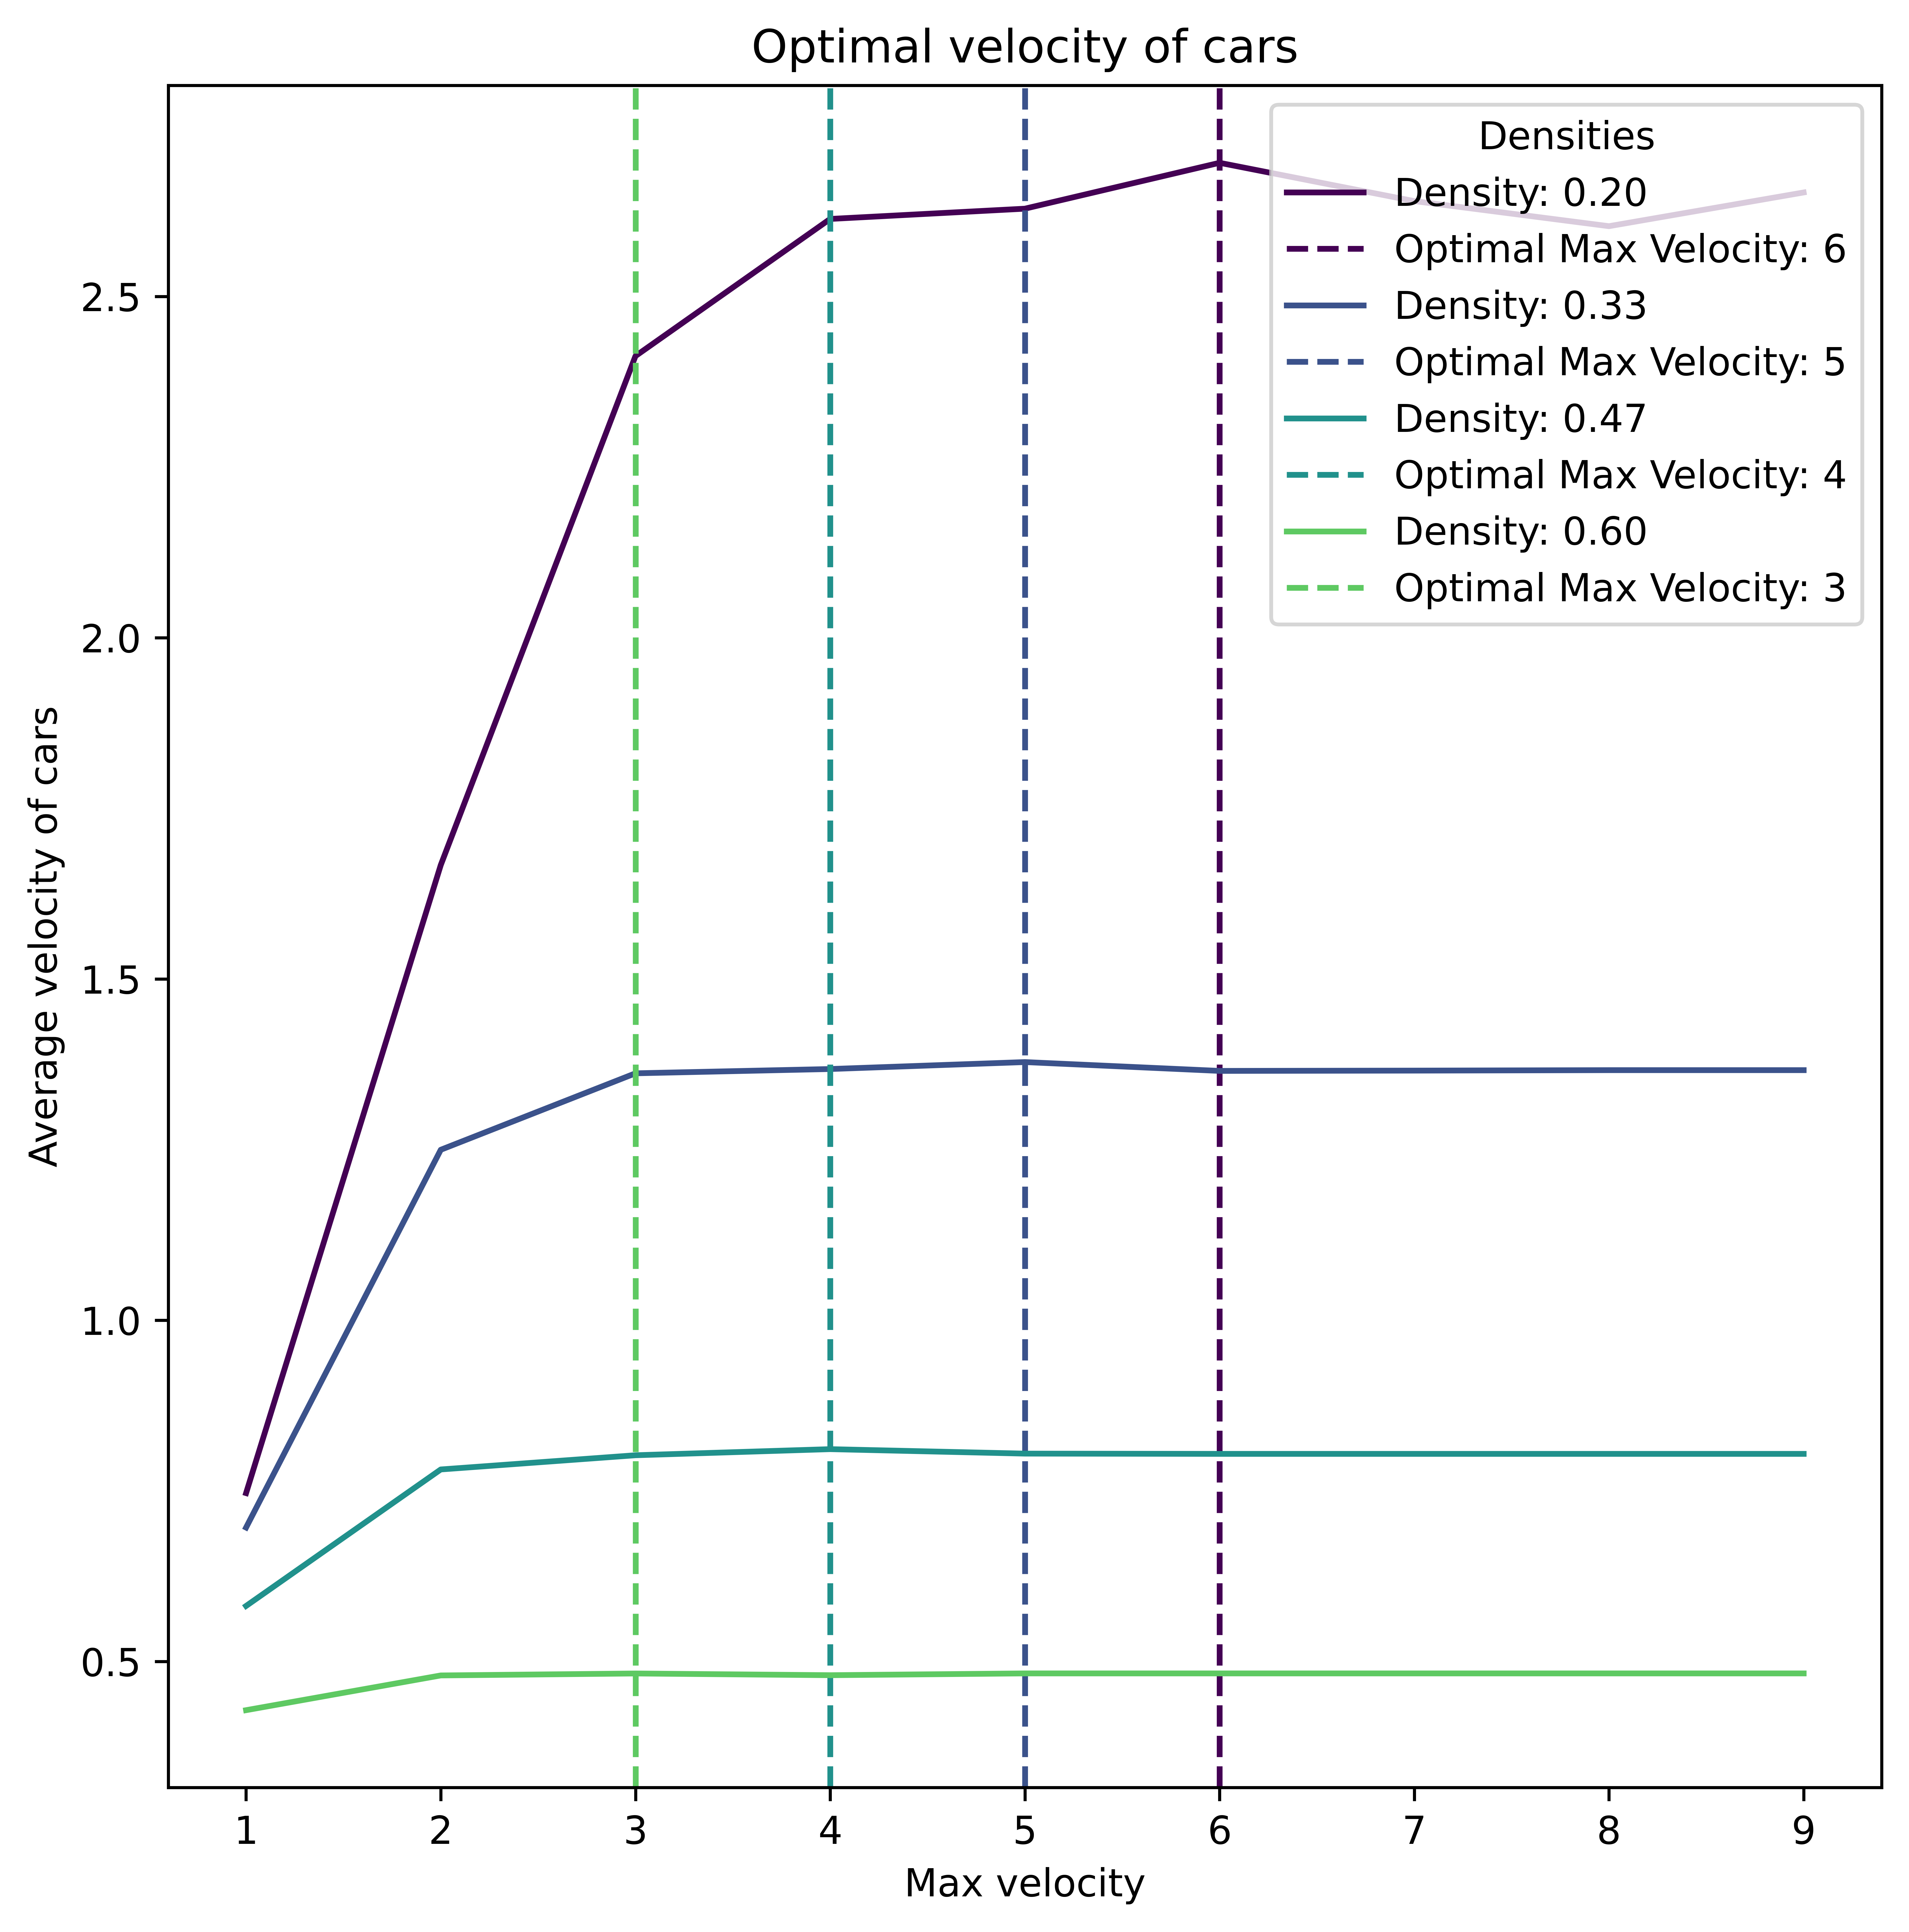

In [16]:
v_max = np.arange(1, 10, 1)
densities = np.linspace(0.2, 0.6, 4)

velocity_averages = []

for v in v_max:
    for density in densities:
        simulation = functions.Nagel_Schreckenberg(L, int(L * density), v, p, tmax)
        simulation.run_model()
        velocity_average = simulation.average_velocity()
        velocity_averages.append(velocity_average)

# Reshape velocity_averages to match the shape of v_max and densities
velocity_averages = np.array(velocity_averages).reshape(len(v_max), len(densities))


plt.figure(figsize = (8,8), dpi=1000)
# For each density
for i in range(len(densities)):
    # Plotting the lines with gradients of colour
    colour = plt.cm.viridis(i / float(len(densities))) 
    plt.plot(v_max, velocity_averages[:, i], color=colour, label=f'Density: {densities[i]:.2f}')

    # Calculate the rate of change of velocity for each density
    rate_of_change = np.diff(velocity_averages[:, i]) / np.diff(v_max)

    # Find the indexes where the rate of change starts decreasing
    optimal_index = np.argmax(rate_of_change < 0)

    # Find the max velocity that corresponds to this index
    optimal_v_max = v_max[optimal_index]

    # Plot the dashed vertical line for optimal max velocity
    plt.axvline(x=optimal_v_max, color=colour, linestyle='--', label=f'Optimal Max Velocity: {optimal_v_max}')

plt.xlabel('Max velocity')
plt.ylabel('Average velocity of cars')
plt.title('Optimal velocity of cars')
plt.legend(title='Densities', loc = 1)
plt.show()
